假設有一個神經元，有兩個輸入x1、x2。權重分別是w1 = 0.8，w2 = 1.2，偏至頂b=-0.5。如果輸入為x1=0.5，x2=0.3，請問經過ReLU激發函數後的輸出是多少?

In [63]:
#梯度下降
import numpy as np
def relu(x):
    return np.maximum(0,x)
x1=0.5
x2=0.3
w1=0.8
w2=1.2
b=-0.5
weighted_sum = w1*x1 + w2*x2 + b
print(f"weighted_sum = {weighted_sum:.3f}")
output = relu(weighted_sum)
print(f"neuron = {output:.3f}")

weighted_sum = 0.260
neuron = 0.260


In [64]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))
# print(f"sigmoid value = {sigmoid(weighted_sum):.3f}")

weighted_sum = -0.1
threshold = 0.5
print(f"weighted_sum = {weighted_sum:.3f}")
print(f"sigmoid value = {sigmoid(weighted_sum):.3f}")

if sigmoid(weighted_sum) >= threshold:
    label = 1
else:
    label = 0
print(f"轉換後的類別:{label}")

weighted_sum = -0.100
sigmoid value = 0.475
轉換後的類別:0


In [65]:
def tanh(x):
    return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))


weighted_sum = 0.7
threshold = 0
print(f"weighted_sum = {weighted_sum:.3f}")
print(f"tanh value = {tanh(weighted_sum):.3f}")

if tanh(weighted_sum) >= threshold:
    label = 1
else:
    label = 0
print(f"轉換後的類別:{label}")

weighted_sum = 0.700
tanh value = 0.604
轉換後的類別:1


In [66]:
def softmax(x):
    exp_x =  np.exp(x)
    return exp_x / np.sum(exp_x) 
x_score = np.array([0.8, 1.0, 0.1])
prob = softmax(x_score)
print(f"機率分布:{prob}")



機率分布:[0.3679192  0.44937753 0.18270327]


In [67]:
def dL_dw(w):
    return 2*(w-3)
w_old = 5
learning_rate = 0.1
gradient = dL_dw(w_old)
print(f"目前權重{w_old}的梯度:{gradient}")

w_new = w_old - gradient * learning_rate
print(f"一次梯度下降後，新的權重:{w_new}")

目前權重5的梯度:4
一次梯度下降後，新的權重:4.6


0


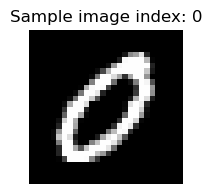

In [68]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
index = 35217
print(y_train[index])
plt.figure(figsize=(2,2))
plt.imshow(x_train[index], cmap='gray')
plt.title(f"Sample image index: {y_train[index]}")
plt.axis('off')
plt.show()

In [69]:
#資料前處理 - 像素正規化
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

#二維圖像陣列壓平成一維陣列
x_train = x_train.reshape((x_train.shape[0],-1))
x_test = x_test.reshape((x_test.shape[0],-1))

#標籤轉換 one-hot Encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)


In [70]:
#建立全連接神經網路
from tensorflow.keras.models import Sequential
model = Sequential()
from tensorflow.keras.layers import Dense, Input
model.add(Input(shape=(784,)))#資料輸入層 784個神經元 對應圖片28*28壓成1維784
model.add(Dense(units=100, activation='relu'))#第1層隱藏層 100個神經元
model.add(Dense(units=100, activation='relu'))#第2層隱藏層 100個神經元
model.add(Dense(units=100, activation='relu'))#第3層隱藏層 100個神經元
model.add(Dense(10, activation='softmax')) #輸出層 10個神經元 對應 0-9手寫文字的類別，2種類型以上的都用softmax
model.summary()#模型概覽

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 99,710 (389.49 KB)

 Trainable params: 99,710 (389.49 KB)

 Non-trainable params: 0 (0.00 B)

請設計一個Keras Sequential模型，包含以下層: 輸入層:500 第一個隱藏層:256 第二個隱藏層:128 輸出層:5

In [71]:
# #建立全連接神經網路
# from tensorflow.keras.models import Sequential
# model = Sequential()
# from tensorflow.keras.layers import Dense, Input
# model.add(Input(shape=(500,)))#資料輸入層 784個神經元 對應圖片28*28壓成1維784
# model.add(Dense(units=256, activation='relu'))#第1層隱藏層 100個神經元
# model.add(Dense(units=128, activation='relu'))#第2層隱藏層 100個神經元
# model.add(Dense(5, activation='softmax')) #輸出層 10個神經元 對應 0-9手寫文字的類別，2種類型以上的都用softmax
# model.summary()#模型概覽

In [72]:
#模型編譯與訓練
model.compile(optimizer='adam' , loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x=x_train, y=y_train, batch_size=30, epochs=10, verbose=1, validation_split=0.1)

Epoch 1/10
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9219 - loss: 0.2575 - val_accuracy: 0.9640 - val_loss: 0.1213
Epoch 2/10
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9648 - loss: 0.1125 - val_accuracy: 0.9708 - val_loss: 0.0926
Epoch 3/10
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9744 - loss: 0.0829 - val_accuracy: 0.9738 - val_loss: 0.0873
Epoch 4/10
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9797 - loss: 0.0634 - val_accuracy: 0.9708 - val_loss: 0.0988
Epoch 5/10
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9835 - loss: 0.0512 - val_accuracy: 0.9713 - val_loss: 0.0953
Epoch 6/10
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9853 - loss: 0.0454 - val_accuracy: 0.9768 - val_loss: 0.0905
Epoch 7/10
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9883 - loss: 0.0358 - val_accuracy: 0.9792 - val_loss: 0.0811
Epoch 8/10
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9897 - loss: 0.0323 - 

In [73]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
(x_train_ex, y_train_ex), (x_test_ex, y_test_ex) = tf.keras.datasets.mnist.load_data()
#資料前處理 - 像素正規化
x_train_ex = x_train_ex.astype('float32') / 255.0
x_test_ex = x_test_ex.astype('float32') / 255.0

#二維圖像陣列壓平成一維陣列
x_train_ex = x_train_ex.reshape((x_train_ex.shape[0],-1))
x_test_ex = x_test_ex.reshape((x_test_ex.shape[0],-1))

#標籤轉換 one-hot Encoding
y_train_ex = tf.keras.utils.to_categorical(y_train_ex, num_classes=10)
y_test_ex = tf.keras.utils.to_categorical(y_test_ex, num_classes=10)




#建立全連接神經網路
from tensorflow.keras.models import Sequential
model_s = Sequential()
from tensorflow.keras.layers import Dense, Input
model_s.add(Input(shape=(784,)))#資料輸入層 784個神經元 對應圖片28*28壓成1維784
model_s.add(Dense(units=128, activation='relu'))#第1層隱藏層 128個神經元\
model_s.add(Dense(10, activation='softmax')) #輸出層 10個神經元 對應 0-9手寫文字的類別，2種類型以上的都用softmax
model_s.summary()#模型概覽

#模型編譯與訓練
model_s.compile(optimizer='sgd' , loss='categorical_crossentropy', metrics=['accuracy'])
history_s = model_s.fit(x=x_train_ex, y=y_train_ex, batch_size=64, epochs=5, verbose=1)

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_22 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7814 - loss: 0.8807
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8879 - loss: 0.4174
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9019 - loss: 0.3533
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9103 - loss: 0.3207
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9161 - loss: 0.2983


In [74]:
from IPython.core import history
final_acc = history_s.history['accuracy'][-1]
print(f"final_acc={final_acc:.3f}")

final_acc=0.916


In [75]:
#模型評估(Evaluate)
loss, accuracy = model.evaluate(x_test,y_test)
print(f"Test loss:{loss:.3f}")
print(f"Test accuracy:{accuracy:.3f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 964us/step - accuracy: 0.9741 - loss: 0.1089
Test loss:0.109
Test accuracy:0.974


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 822us/step


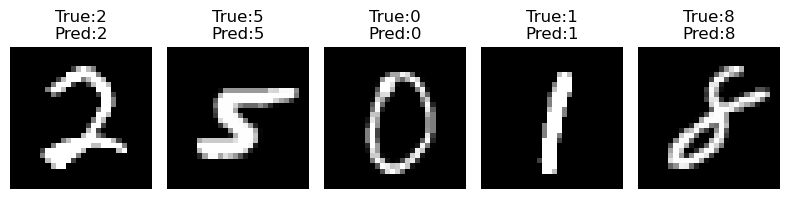

In [76]:
#模型預測(Predict)
predictions = model.predict(x_test)
predicted_label = np.argmax(predictions[0])
true_label = np.argmax(y_test[0])

plt.figure(figsize=(8,6))
for i in range(5):
  idx = np.random.randint(0,x_test.shape[0])
  sample_image = x_test[idx]
  true_label = y_test[idx]
  predicted_prod = model.predict(x_test[idx:idx+1], verbose=0)
  predicted_label = np.argmax(predicted_prod[0])
  plt.subplot(1,5,i+1)
  plt.imshow(sample_image.reshape(28,28), cmap='gray')
  plt.title(f"True:{np.argmax(true_label)}\nPred:{predicted_label}")
  plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
#模型儲存
model_filename = 'minist_dnn_model.h5'
model.save(model_filename)

In [78]:
#模型載入
loaded_model = tf.keras.models.load_model(model_filename)
loss_loaded , accuracy_loaded = loaded_model.evaluate(x_test,y_test,verbose=0)

In [81]:
accuracy_loaded

0.9740999937057495